Paquetes necesarios

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [2]:
#Dimensiones de la imagen a crear
ancho = 800
alto = 800

***TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez***

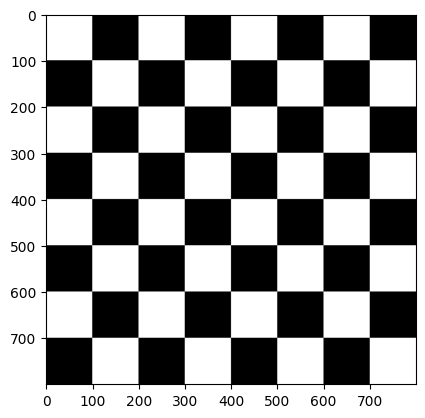

In [4]:
# Aplicamos color a cada casilla del tablero de ajedrez
def aplicar_color_casilla(color_img, i, j, tamaño_casilla, color=255):
    if (i + j) % 2 == 0:
        color_img[i * tamaño_casilla:(i + 1) * tamaño_casilla, j * tamaño_casilla:(j + 1) * tamaño_casilla] = color

tamaño_casilla = 100  # Tamaño de cada casilla en píxeles
alto = 8 * tamaño_casilla
ancho = 8 * tamaño_casilla

# Crear una imagen negra
color_img = np.zeros((alto, ancho, 3), dtype=np.uint8)

# Alternar colores de las casillas usando la función
[aplicar_color_casilla(color_img, i, j, tamaño_casilla) for i in range(8) for j in range(8)]

# Visualiza con matplotlib (especificando el mapa de color gris)
plt.imshow(color_img, cmap='gray')
plt.show()

**Lo modificamos a color verde**

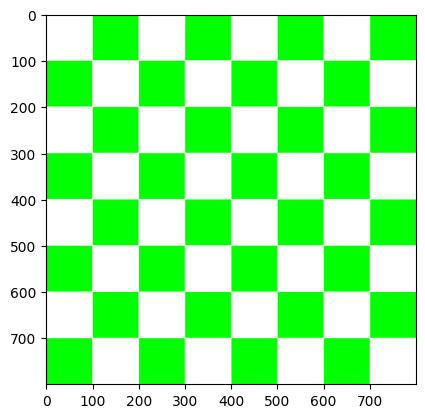

In [34]:
#Modifica el primer plano de color (Rojo, ya que es RGB)
# color_img[:,:,0] = 255
color_img[:,:,1] = 255 #Prueba otras combinaciones
# color_img[:,:,2] = 0
plt.imshow(color_img)
plt.show()

**TAREA 2: Crear una imagen estilo Mondrian**

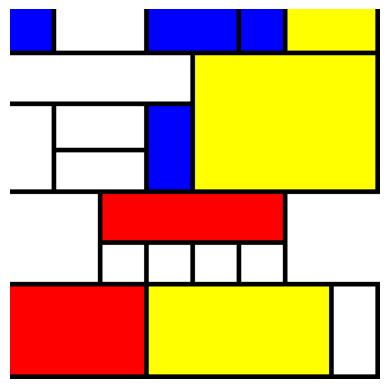

In [39]:
# El siguiente programa genera cuadros aleatorios de estilo Mondrian
import random
# Se crea una imagen en blanco
color_img = np.ones((alto, ancho, 3), dtype=np.uint8) * 255

# Se define colores (en formato RGB) y tamaños
colores = [[255, 0, 0], [0, 0, 255], [255, 255, 0], [255, 255, 255], [255, 255, 255]]  # Rojo, Azul, Amarillo, Blanco 2 veces porque suele haber más blanco en los cuadros de Mondrian.
tamaños = [100, 200, 300, 400]

# Se escogen al azar el color, el alto y el ancho del primer rectángulo de entre los previamente definidos
color_rect, alto_rect, ancho_rect = colores[random.randint(0, len(colores)-1)], tamaños[random.randint(0, len(tamaños) - 1)], tamaños[random.randint(0, len(tamaños) - 1)]

# Se definen las variables posición X e Y, inicializandolas a 0
posicionX, posicionY = 0, 0

while posicionY < alto:
    while posicionX < ancho:
        # Se pinta un rectángulo empezando a la derecha del anterior
        color_img[posicionY:posicionY + alto_rect, posicionX:posicionX + ancho_rect, :] = color_rect
        # Se pinta una raya negra de ancho 10 desde la esquina superior derecha del cuadrado hasta la parte inferior de la imagen (por dentro)
        color_img[posicionY:alto, posicionX + ancho_rect - 10:posicionX + ancho_rect, :] = [0,0,0]
        # Se pinta una raya negra del ancho del cuadrado y de altura 10 debajo del cuadrado (por fuera)
        color_img[posicionY + alto_rect:posicionY + alto_rect + 10, posicionX:posicionX + ancho_rect, :] = [0,0,0]
	    # Se avanza la posición hasta la esquina superior derecha del rectángulo para comenzar en ese punto al crear el siguiente
        posicionX += ancho_rect
	    # Se escogen nuevos color, alto y ancho para el siguiente rectángulo
        color_rect, alto_rect, ancho_rect = colores[random.randint(0, len(colores)-1)], tamaños[random.randint(0, len(tamaños) - 1)], tamaños[random.randint(0, len(tamaños) - 1)]

    # Cuando la posición llegue al lateral derecho de la imagen o lo sobrepase volverá a la izquierda bajando una altura escogida al azar para continuar
    # generando rectángulos hacia la derecha a esta nueva altura
    posicionX = 0
    posicionY += alto_rect

    # Al comenzar una nueva fila de rectángulos se pinta una raya negra de altura 10 y del ancho total
    color_img[posicionY-10:posicionY, 0: ancho, :] = [0,0,0]

# Cuando la posición Y sea mayor que el alto y la posición X sea mayor que el ancho habremos terminado el dibujo y se muestra la imagen.
plt.imshow(color_img)
plt.axis('off')  # Ocultar los ejes
plt.show()

**TAREA 3: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV**

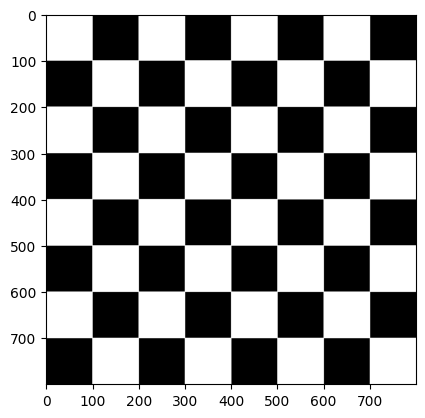

In [40]:
tamaño_casilla = 100  # Tamaño de cada casilla en píxeles

# Crear una imagen negra
color_img = np.zeros((alto, ancho, 3), dtype=np.uint8)

# Alternar colores de las casillas
for i in range(alto // tamaño_casilla):
    for j in range(ancho//tamaño_casilla):
        # Dibujar el rectángulo blanco si la suma de i + j es par (para alternar)
        if (i+ j) % 2 == 0:
            cv2.rectangle(color_img,
                          (j * tamaño_casilla, i * tamaño_casilla),
                          ((j + 1) * tamaño_casilla, (i + 1) * tamaño_casilla),
                          (255, 255, 255), -1)

# Visualiza con matplotlib (especificando el mapa de color gris)
plt.imshow(color_img, cmap='gray')
plt.show()

**TAREA 4: Modifica de forma libre los valores de un plano de la imagen**

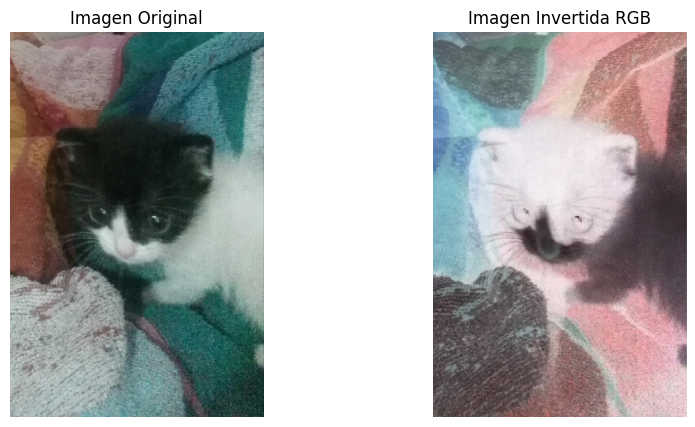

In [41]:
# Cargar la imagen en color
color_img_cat = cv2.imread('cat.jpg', cv2.IMREAD_COLOR)

# Convertir la imagen de BGR a RGB (OpenCV usa BGR por defecto, matplotlib usa RGB)
color_img_rgb = cv2.cvtColor(color_img_cat, cv2.COLOR_BGR2RGB)

# Invertir los colores
inver_img_rgb = 255 - color_img_rgb

# Mostrar la imagen original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(color_img_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen invertida
plt.subplot(1, 2, 2)
plt.imshow(inver_img_rgb)
plt.title('Imagen Invertida RGB')
plt.axis('off')

plt.show()

**Cargamos imágenes en gris y aplicamos el desenfoque Gaussiano**

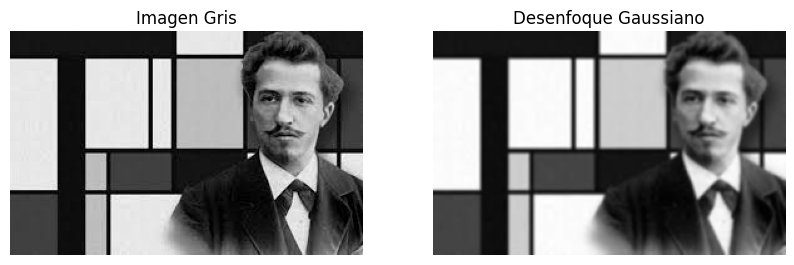

In [42]:
# Cargar la imagen en color
color_img_mondrian = cv2.imread('Piet_mondrian.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar un desenfoque Gaussiano a la imagen en escala de grises
blurred_image = cv2.GaussianBlur(color_img_mondrian, (5, 5), 0)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))

# Imagen Invertida
plt.subplot(1, 2, 1)
plt.imshow(color_img_mondrian, cmap='gray')
plt.title('Imagen Gris')
plt.axis('off')

# Imagen en Escala de Grises con Desenfoque
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Desenfoque Gaussiano')
plt.axis('off')

plt.show()


**Aplicamos a una imagen contraste y detección de bordes**

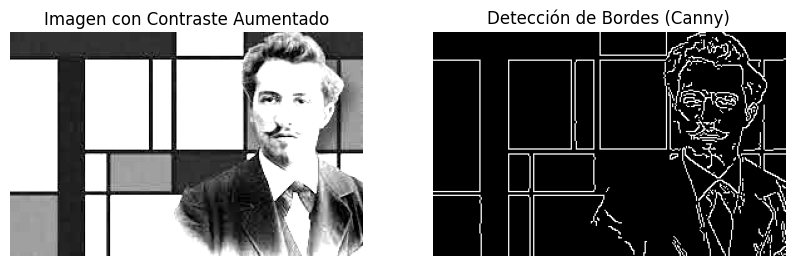

In [43]:
# Ajustar el contraste de la imagen
alpha = 2.5  # Factor de contraste
contrast_image = np.clip(alpha * color_img_mondrian, 0, 255).astype(np.uint8)

# Aplicar la detección de bordes usando el filtro Canny
edges = cv2.Canny(color_img_mondrian, 140, 180)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))

# Imagen con Ajuste de Contraste
plt.subplot(1, 2, 1)
plt.imshow(contrast_image, cmap='gray')
plt.title('Imagen con Contraste Aumentado')
plt.axis('off')

# Imagen con Detección de Bordes (Canny)
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detección de Bordes (Canny)')
plt.axis('off')

plt.show()

**Aplicamos la división, inversión y módulo escalado RGB**


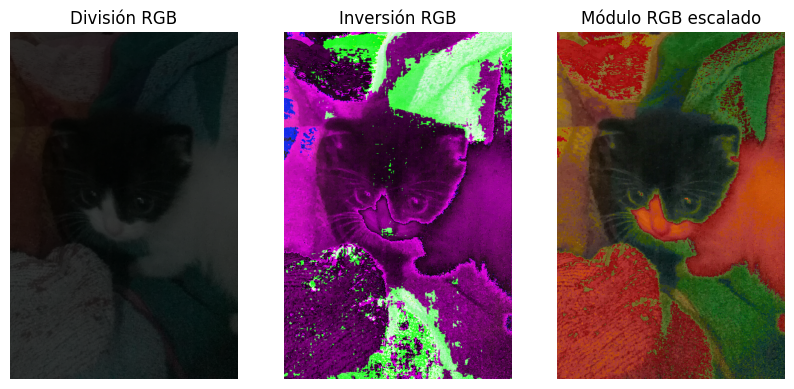

In [44]:
# Convertir la imagen de BGR a RGB (OpenCV usa BGR por defecto, matplotlib usa RGB)
color_img_rgb = cv2.cvtColor(color_img_cat, cv2.COLOR_BGR2RGB)

# Separar los canales
red = color_img_rgb[:,:,0]
green = color_img_rgb[:,:,1]
blue = color_img_rgb[:,:,2]

# División
r_div = np.clip(red / 4, 0, 255)
g_div = np.clip(green  / 4, 0, 255)
b_div = np.clip(blue / 4, 0, 255)

# Se crea una imagen con los planos divididos
div_img = cv2.merge((r_div.astype(np.uint8), g_div.astype(np.uint8), b_div.astype(np.uint8)))

# Inversión de color
red_inverted = np.clip(red + green, 0, 255)
green_inverted = np.clip(green - blue, 0, 255)
blue_inverted = np.clip(blue + red, 0, 255)

# Se crea una imagen con los planos invertidos
inverted_img = cv2.merge((red_inverted.astype(np.uint8), green_inverted.astype(np.uint8), blue_inverted.astype(np.uint8)))

# Módulo
r_mod = np.clip(red % 255, 0, 255)
g_mod = np.clip(green % 128, 0, 255)
b_mod = np.clip(blue % 64, 0, 255)

# Se crea una imagen con los planos módulo
mod_img = cv2.merge((r_mod.astype(np.uint8), g_mod.astype(np.uint8), b_mod.astype(np.uint8)))

# Mostrar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(div_img)
plt.title('División RGB')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(inverted_img)
plt.title('Inversión RGB')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mod_img)
plt.title('Módulo RGB escalado')
plt.axis('off')

plt.show()

**Modificamos los valores del plano por webcam**


In [22]:
vid = cv2.VideoCapture(0)

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        r = r + g
        g = g - b
        b = b + r

        # Ajustamos los valores a un rango válido [0, 255]
        r = np.clip(r, 0, 255)
        g = np.clip(g, 0, 255)
        b = np.clip(b, 0, 255)

        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))

        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Inversión RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

**TAREA 5: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen**


(np.float64(-0.5), np.float64(281.5), np.float64(178.5), np.float64(-0.5))

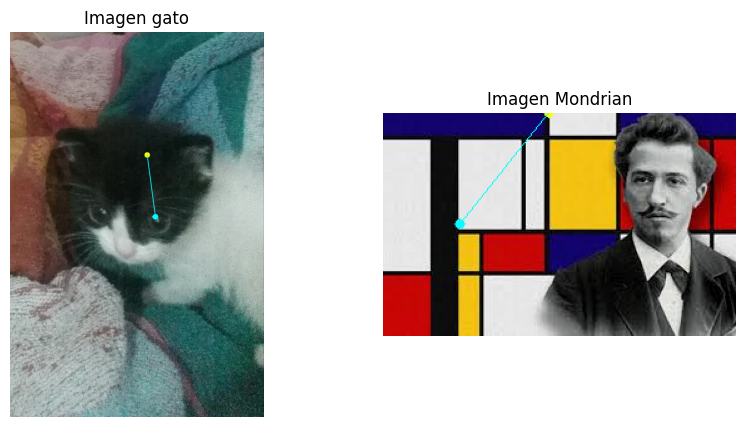

In [45]:
gray_img = cv2.cvtColor(color_img_cat, cv2.COLOR_BGR2GRAY)

# Encontrar los píxeles más claro y más oscuro
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_img)

# Dibujar círculos y una línea entre los puntos
cv2.circle(color_img_cat, max_loc, 10, (255, 255, 0), -1)
cv2.circle(color_img_cat, min_loc, 10, (0, 255, 255), -1)
cv2.line(color_img_cat, min_loc, max_loc, (255, 255, 0), 2)

# Cargar la imagen en color
color_img_mondrian = cv2.imread('Piet_mondrian.jpg', cv2.IMREAD_COLOR)

gray_img_mondrian = cv2.cvtColor(color_img_mondrian, cv2.COLOR_BGR2GRAY)

# Encontrar los píxeles más claro y más oscuro
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_img_mondrian)

# Dibujar círculos y una línea entre los puntos
cv2.circle(color_img_mondrian, max_loc, 4, (255, 255, 0), -1)
cv2.circle(color_img_mondrian, min_loc, 4, (0, 255, 255), -1)
cv2.line(color_img_mondrian, min_loc, max_loc, (255, 255, 0), 1)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))

# Subplot para la primera imagen
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(color_img_cat, cv2.COLOR_BGR2RGB))
plt.title('Imagen gato')
plt.axis('off')

# Subplot para la segunda imagen
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color_img_mondrian, cv2.COLOR_BGR2RGB))
plt.title('Imagen Mondrian')
plt.axis('off')

**Pintar círculos en las posiciones del píxel más claro y oscuro por webcam**


In [46]:
# Iniciar la captura de video desde la cámara
vid = cv2.VideoCapture(0)

while True:
    # Capturar un fotograma del video
    ret, frame = vid.read()

    if ret:
        # Convertir el fotograma a gris
        gray_vid = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encontrar los píxeles más claro y más oscuro
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_vid)

        # Dibujar
        cv2.circle(frame, max_loc, 10, (255, 255, 0), -1)
        cv2.circle(frame, min_loc, 10, (0, 255, 255), -1)
        cv2.line(frame, min_loc, max_loc, (255, 255, 0), 2)

        cv2.imshow('Detectar zona oscura y clara', frame)

    # Salir del bucle si se presiona la tecla ESC (código 27)
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto
vid.release()
cv2.destroyAllWindows()

**Pintar círculos sobre la zona 8x8 más clara/oscura**

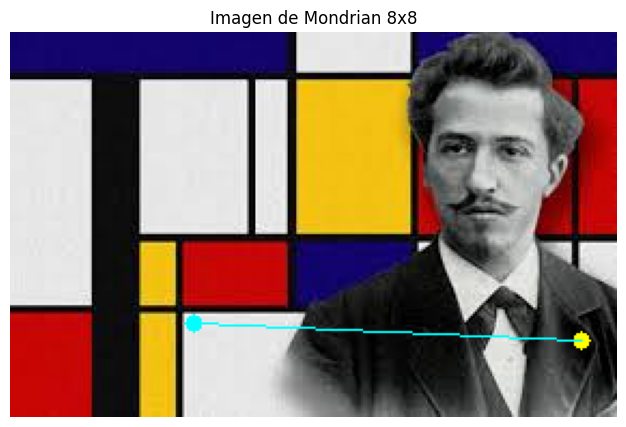

In [47]:
def find_clear_and_darkest_regions(gray_img, block_size=8):
    h, w = gray_img.shape

    # almacenar la suma máxima y mínima de intensidades
    min_sum = 255 * block_size * block_size  # Valor máximo posible para una región de 8x8
    max_sum = 0

    # Buscando la región de 8x8 píxeles con la suma máxima y mínima
    for y in range(0, h - block_size + 1):
        for x in range(0, w - block_size + 1):
            region = gray_img[y:y+block_size, x:x+block_size]
            region_sum = np.sum(region)

            if region_sum > max_sum:
                max_sum = region_sum
                max_loc = (x + block_size // 2, y + block_size // 2)

            if region_sum < min_sum:
                min_sum = region_sum
                min_loc = (x + block_size // 2, y + block_size // 2)

    return min_loc, max_loc

# Cargar la imagen en color
color_img_mondrian = cv2.imread('Piet_mondrian.jpg', cv2.IMREAD_COLOR)

# Convertir a escala de grises
gray_img_mondrian = cv2.cvtColor(color_img_mondrian, cv2.COLOR_BGR2GRAY)

# Encontrar las regiones más clara y más oscura
min_loc, max_loc = find_clear_and_darkest_regions(gray_img_mondrian, block_size=8)

# Dibujar círculos y una línea entre los puntos
cv2.circle(color_img_mondrian, max_loc, 4, (255, 255, 0), -1)  # Región más clara en amarillo
cv2.circle(color_img_mondrian, min_loc, 4, (0, 255, 255), -1)  # Región más oscura en cyan
cv2.line(color_img_mondrian, min_loc, max_loc, (255, 255, 0), 1)  # Línea entre las regiones

# Mostrar la imagen
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(color_img_mondrian, cv2.COLOR_BGR2RGB))
plt.title('Imagen de Mondrian 8x8')
plt.axis('off')
plt.show()

**Pintar círculos sobre la zona 8x8 más clara/oscura por webcam**

In [48]:

# Iniciar la captura de video desde la cámara
vid = cv2.VideoCapture(0)

while True:
    # Capturar un fotograma del video
    ret, frame = vid.read()
    frame = cv2.resize(frame, (frame.shape[1] // 2, frame.shape[0] // 2))
    if ret:
        # Convertir el fotograma a gris
        gray_vid = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encontrar los píxeles más claro y más oscuro
        min_loc, max_loc = find_clear_and_darkest_regions(gray_vid, block_size=8)

        # Dibujar
        cv2.circle(frame, max_loc, 10, (255, 255, 0), -1)
        cv2.circle(frame, min_loc, 10, (0, 255, 255), -1)
        cv2.line(frame, min_loc, max_loc, (255, 255, 0), 2)

        cv2.imshow('Detectar zona oscura y clara', frame)

    # Salir del bucle si se presiona la tecla ESC (código 27)
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto
vid.release()
cv2.destroyAllWindows()

**TAREA 6: Llevar a cabo una propuesta propia de pop art**

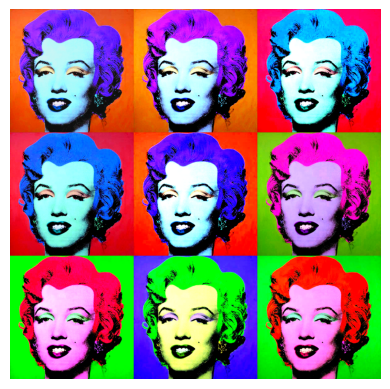

In [49]:
from PIL import Image, ImageEnhance
import numpy as np
import random
import matplotlib.pyplot as plt

# Cargar la imagen desde el archivo proporcionado
image_path = 'MARILYN.jpg'

def change_hue(image, hue_shift):
    """Función para ajustar el tono (hue) de la imagen."""
    # Convertir la imagen a modo HSV para modificar el hue
    img_hsv = image.convert('HSV')
    np_img = np.array(img_hsv)

    # Cambiar el hue (primer canal en HSV) agregando un valor de cambio
    np_img[:, :, 0] = (np_img[:, :, 0].astype(int) + hue_shift) % 255  # Cambio de hue
    img_hue_shifted = Image.fromarray(np_img, 'HSV')

    # Volver a convertir la imagen a modo RGB
    return img_hue_shifted.convert('RGB')

def apply_random_effects(image, brightness_factor, contrast_factor, saturation_factor, hue_shift):
    """Función para aplicar efectos de color a la imagen."""
    # Cambiar el hue de la imagen
    image = change_hue(image, hue_shift)

    # Ajustar el brillo
    image = ImageEnhance.Brightness(image).enhance(brightness_factor)

    # Ajustar el contraste
    image = ImageEnhance.Contrast(image).enhance(contrast_factor)

    # Ajustar la saturación
    image = ImageEnhance.Color(image).enhance(saturation_factor)

    return image

# Abrir la imagen original
img = Image.open(image_path)
img = img.convert('RGB')

# Definir el tamaño de la imagen final en función de las réplicas
w, h = img.size
final_img = Image.new('RGB', (w * 3, h * 3))  # Crear un lienzo en blanco 3x3

# Crear una cuadrícula 3x3 con variaciones de la imagen original
for i in range(3):
    for j in range(3):
        # Generar los factores una sola vez
        brightness_factor, contrast_factor, saturation_factor, hue_shift = random.uniform(1, 1.2), random.uniform(0.8, 1.5), random.uniform(1.5, 2.5), random.randint(50, 255)

        # Aplicar efectos aleatorios a cada imagen
        img_effect = apply_random_effects(img, brightness_factor, contrast_factor, saturation_factor, hue_shift)

        # Pegar la imagen con efectos en la posición correspondiente
        final_img.paste(img_effect, (i * w, j * h))

# Mostrar la imagen final con estilo Pop Art 3x3
plt.imshow(final_img)
plt.axis('off')  # Ocultar los ejes
plt.show()


**Propuesta propia de pop art por webcam**

In [52]:
import cv2
import numpy as np
from PIL import Image
import random

# Generar los factores una sola vez
brightness_factor, contrast_factor, saturation_factor, hue_shift = random.uniform(1, 1.2), random.uniform(0.8, 1.5), random.uniform(1.5, 2.5), random.randint(50, 255)

# Iniciar captura de video desde la cámara
vid = cv2.VideoCapture(0)

while(True):
    # Leer frame a frame desde la cámara
    ret, frame = vid.read()

    # Comprobar si hay un nuevo frame
    if ret:
        # Convertir el frame de OpenCV (BGR) a PIL (RGB)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(frame_rgb)

        # Aplicar efectos de color y textura
        pil_image_with_effects = apply_random_effects(pil_image, brightness_factor, contrast_factor, saturation_factor, hue_shift)

        # Convertir de PIL a formato OpenCV para mostrar
        frame_with_effects = np.array(pil_image_with_effects)
        frame_with_effects = cv2.cvtColor(frame_with_effects, cv2.COLOR_RGB2BGR)

        # Mostrar el frame con efectos en la ventana
        cv2.imshow('Video Pop Art', frame_with_effects)

    # Detenemos pulsando ESC
    if cv2.waitKey(20) & 0xFF == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye las ventanas
cv2.destroyAllWindows()
